<a href="https://colab.research.google.com/github/gabsgeografo/InteligenciaArtificialMestrado/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas e criação das pastas para treinamento

Com base no nome das imagens, as mesmas foram dividas em dois grupos: 

Fita e Classes

Neste bloco é criada a estrutura das pastas separando em Classe e Fita.

Objetivo da rede: idenficar o que é Classe e o que é Fita

A base entre Train (Treinamento) e Test (Teste) foi dividida aleatóriamente em 30% teste e 70% treinamento.

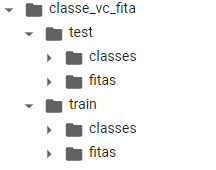

In [ ]:
import os
from random import seed
from random import random
from shutil import copyfile
from os import makedirs
from os import listdir

from google.colab import drive
drive.mount('/content/drive')

def criar_diretorio(caminho):
  if not os.path.exists(caminho):
    os.makedirs(caminho)

criar_diretorio('IA')
criar_diretorio('IA/Images')

#Carrega imagens do Drive
!cp -r  /content/drive/Othercomputers/Meu\ laptop/Relatorio/Novas/IA/Novas /content/IA/Images

#cria estrutura de arquivos
dataset_home = 'classe_vc_fita/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['classes/', 'fitas/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.3
# copy training dataset images into subdirectories

folder = '/content/IA/Images/Novas/'

src_directory = folder #'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('classe'):
		dst = dataset_home + dst_dir + 'classes/'  + file
		copyfile(src, dst)
	elif file.startswith('fita'):
		dst = dataset_home + dst_dir + 'fitas/'  + file
		copyfile(src, dst)  

Mounted at /content/drive


Criar uma rede VGG19, usando transfer learnig

In [ ]:
# save the final model to file
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import plot_model
 
# define cnn model
def define_model():
	# load model
  model = VGG19(include_top=False, input_shape=(200, 200, 3))
	# mark loaded layers as not trainable
  model.trainable = True
  # for layer in model.layers:
  #  layer.trainable = False
	# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(64, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
	# define new model
  model = Model(inputs=model.inputs, outputs=output)
	# compile model
  #opt = SGD(lr=0.001, momentum=0.9)

  model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  model.summary()
  # plot model architecture
  plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')  
  return model

  

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
train_it = datagen.flow_from_directory('classe_vc_fita/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('classe_vc_fita/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 726 images belonging to 2 classes.
Found 282 images belonging to 2 classes.


In [ ]:
model = define_model()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1, )

Epoch 1/50
12/12 [==============================] - 13s 1s/step - loss: 56.9848 - accuracy: 0.6281 - val_loss: 0.6215 - val_accuracy: 0.7128
Epoch 2/50
12/12 [==============================] - 12s 1s/step - loss: 0.6212 - accuracy: 0.7163 - val_loss: 0.5910 - val_accuracy: 0.7128
Epoch 3/50
12/12 [==============================] - 12s 967ms/step - loss: 0.5997 - accuracy: 0.7149 - val_loss: 0.6077 - val_accuracy: 0.7163
Epoch 4/50
12/12 [==============================] - 12s 975ms/step - loss: 0.5889 - accuracy: 0.7190 - val_loss: 0.6109 - val_accuracy: 0.7128
Epoch 5/50
12/12 [==============================] - 13s 1s/step - loss: 0.5947 - accuracy: 0.7190 - val_loss: 0.6979 - val_accuracy: 0.5709
Epoch 6/50
12/12 [==============================] - 12s 974ms/step - loss: 0.5829 - accuracy: 0.7121 - val_loss: 0.5802 - val_accuracy: 0.7128
Epoch 7/50
12/12 [==============================] - 12s 1s/step - loss: 0.5724 - accuracy: 0.7121 - val_loss: 0.5989 - val_accuracy: 0.7163
Epoch 8/50

In [ ]:
from matplotlib import pyplot

def summarize_diagnostics(history):

	#pyplot.subplot(211)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()

	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('plot_VGG16_sem_treino_50.png')
	pyplot.close()

summarize_diagnostics(history)

qer, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

5/5 [==============================] - 2s 410ms/step - loss: 0.6130 - accuracy: 0.7128
> 71.277


RESULTADO

Teste 1: 

Não utilizando os pesos treinados da rede VGG19. 

Parâmetro que indica se irá ou não usar o modelo treinado da VGG19. True indica que não usará os pesos pré-treinados da VGG19, e treinára todos as camadas da rede.

model.trainable = true

Com 10 épocas o resultado foi:

Acurácia de 82,6% e o tempo de processamento foi de 02:43 min.

Gráfico Acurácia
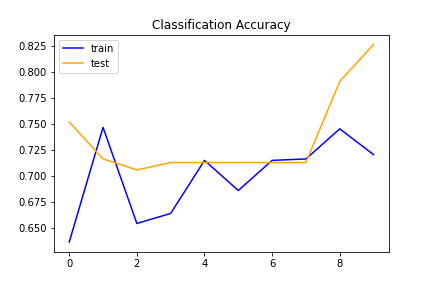

Com 20 épocas o resultado foi:

Acurácia de 81,5% e o tempo de processamento foi de 04:44 min.

Gráfico Acurácia
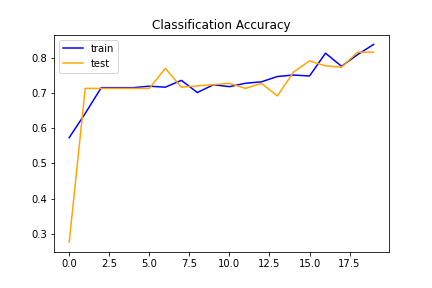

Com 50 épocas o resultado foi:

Acurácia de 96,8% e o tempo de processamento foi de 10:42 min.

Gráfico Acurácia
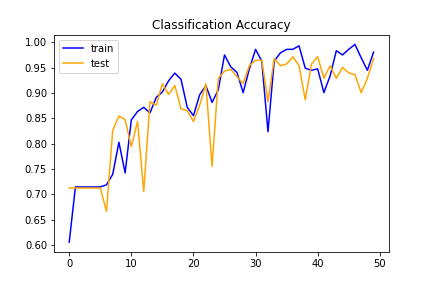

-------------------------------------

Teste 2: 

Congelando os pesos treinados da rede VGG19.

Parâmetro que indica se irá ou não usar o modelo treinado da VGG19. False indica usará os pesos pré-treinados da VGG19.

model.trainable = False

Com 10 épocas o resultado foi:

Acurácia de 99,2% e o tempo de processamento foi de 01:30 min.

Gráfico Acurácia
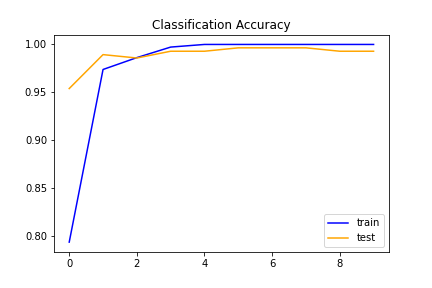

Com 20 épocas o resultado foi:

Acurácia de 99,6% e o tempo de processamento foi de 03:48 min.

Gráfico Acurácia
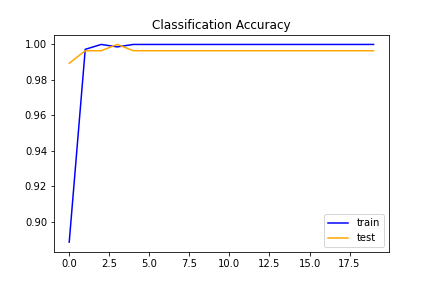

Com 50 épocas o resultado foi:

Acurácia de 99,3% e o tempo de processamento foi de 08:01 min.

Gráfico de Acurácia
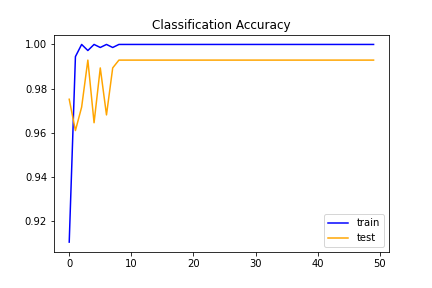

Podemos observar que a rede VGG16 utilizando transfer learning (Teste 2), alcançou uma acurácia de 99% com apenas 10 épocas e aproximadamente 01:30min. Quando o treino foi realizado com 20 e 50 épocas, a rede se estabelizava próximo as 10 épocas e depois disso se mantem constante sem melhoria significativa.

Quando a rede não usa o transfer learnig, o resultado pode chegar a 96% utilizando de 50 épocas e aproximadamente 20min.

Portanto podemos observar que transfer learning é uma técnica muito eficiente e eficaz e pode ser emprgada com execelentes resultados.